In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [24]:
IMAGE_SIZE = (738,1600)
BATCH_SIZE = 2
CHANNELS = 3

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "New_folder",
    shuffle = True,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE   
)

Found 6 files belonging to 1 classes.


In [8]:
class_names = dataset.class_names
class_names

['seven']

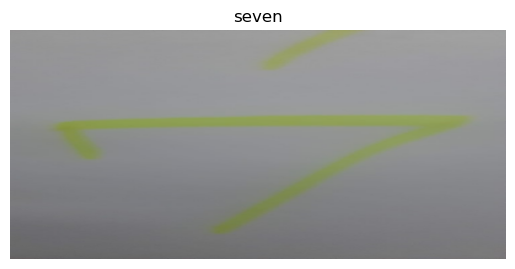

In [6]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

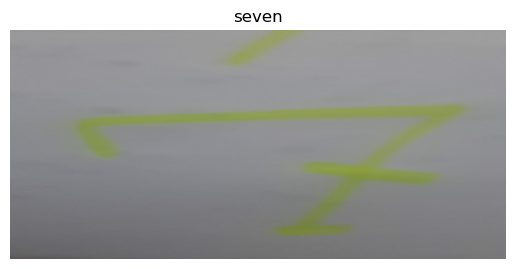

In [9]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

In [10]:
def get_dataset_partitions_tf (ds, train_split = 0.8, val_split = 0.1,
                               test_split=0.1, shuffle = True,
                               shuffle_size = 1000
                              ):
        
        ds_size = len(ds)
    
        if shuffle:
            ds = ds.shuffle(shuffle_size, seed = 10)
        
        train_size = int(train_split * ds_size)
        val_size = int(val_split * ds_size)
        
        train_ds = ds.take(train_size)
        
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
        
        return train_ds, val_ds, test_ds

In [11]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [12]:
len(test_ds)

1

In [13]:
tarin_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
from keras import models, layers

In [30]:

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Example input shape for image data (32x32 RGB images)
num_classes = 3           # Example number of output classes

# Create a sequential model
mod= models.Sequential(
    # Convolutional layers
    layers.Conv2D(5, (3, 3), activation='relu', input_shape=input_shape),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    # Dense layers
    #layers.Flatten(),
    layers.Dense(5, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
)

# Print model summary
model.summary()


ValueError: Argument `name` must be a string and cannot contain character `/`. Received: name=<Dense name=dense_19, built=False> (of type <class 'keras.src.layers.core.dense.Dense'>)